In [1]:
import pandas as pd
import numpy as np
import zipfile

%matplotlib notebook
import matplotlib.pyplot as plt

plt.rcParams['toolbar'] = 'None' 

import nbimporter
from Common import *

importing Jupyter notebook from Common.ipynb


#### Loading data from zip files

In [2]:
[idLookUp, keypoints_columns, train, test, train_X, train_y, test_X] = load_all_data()

Take a brief look on data

In [3]:
train[train.columns[0:-1]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,2140,66.221549,2.087683,47.835757,65.046300,66.129065,67.332093,78.013082
left_eye_center_y,2140,36.842274,2.294027,23.832996,35.468842,36.913319,38.286438,46.132421
right_eye_center_x,2140,29.640269,2.051575,18.922611,28.472224,29.655440,30.858673,42.495172
right_eye_center_y,2140,37.063815,2.234334,24.773072,35.818377,37.048085,38.333884,45.980981
left_eye_inner_corner_x,2140,59.272128,2.005631,41.779381,58.113054,59.327154,60.521492,69.023030
left_eye_inner_corner_y,2140,37.856014,2.034500,27.190098,36.607950,37.845220,39.195431,47.190316
left_eye_outer_corner_x,2140,73.412473,2.701639,52.947144,71.741978,73.240045,74.978684,87.032252
left_eye_outer_corner_y,2140,37.640110,2.684162,26.250023,36.102409,37.624207,39.308331,49.653825
right_eye_inner_corner_x,2140,36.603107,1.822784,24.112624,35.495730,36.620735,37.665280,47.293746
right_eye_inner_corner_y,2140,37.920852,2.009505,26.250023,36.766783,37.920336,39.143921,44.887301


<IPython.core.display.Javascript object>


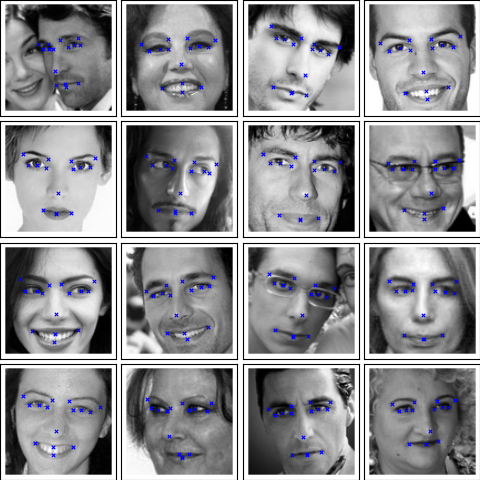

In [5]:
plot_images(train,train_y,130)

# Simple avg benchmark

Calculate average value for each keypoint and use this value as result

In [6]:
z = zipfile.ZipFile('data/training.zip')
train_full = pd.read_csv(z.open('training.csv'))
benchmark = train_full[keypoints_columns].mean()
benchmark.head()

left_eye_center_x          66.359021
left_eye_center_y          37.651234
right_eye_center_x         30.306102
right_eye_center_y         37.976943
left_eye_inner_corner_x    59.159339
dtype: float64

In [7]:
y_bench = np.vstack([ [benchmark.values] for i in range(len(test_X)) ])

<IPython.core.display.Javascript object>


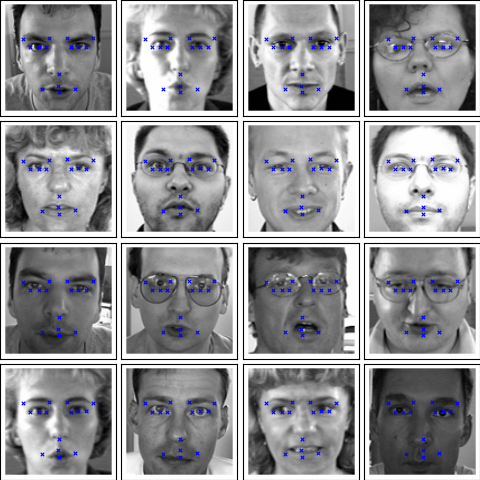

In [8]:
plot_images(test, y_bench,10)

In [9]:
rowids = [ row.RowId for index,row in idLookUp.iterrows()]
values_benchmark = [ benchmark[row.FeatureName] for index,row in idLookUp.iterrows()]

In [10]:
benchmark_submission = pd.DataFrame(values_benchmark, index=rowids, columns=['Location'])
benchmark_submission.index.name='RowId'
benchmark_submission.head()

,Location
RowId,
1,66.359021
2,37.651234
3,30.306102
4,37.976943
5,59.159339


In [11]:
benchmark_submission.to_csv('submissions/benchmark.csv')

I got 3.96244 score, which is too low, as I expected.

## Linear regression
Lets try simple linear regression model

In [12]:
from sklearn import linear_model

In [13]:
linear_clf =  linear_model.LinearRegression(n_jobs=-1)
linear_clf.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [14]:
train_X.shape

(2140, 9216)

In [15]:
y_linear = linear_clf.predict(test_X)

<IPython.core.display.Javascript object>


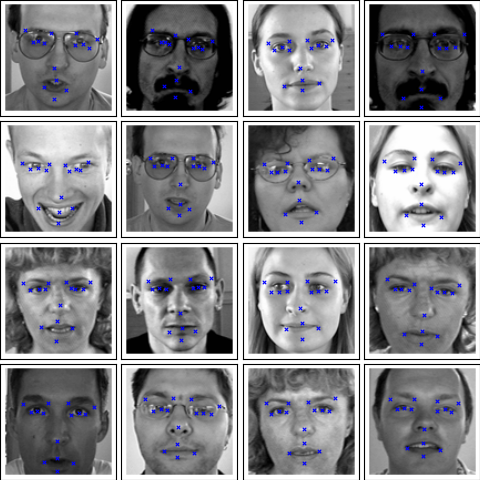

In [16]:
plot_images(test, y_linear, 12)

In [17]:
linear_df = pd.DataFrame(y_linear)
linear_df.columns = keypoints_columns
linear_df.index = range(1,len(test)+1)
linear_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,1783,65.842139,2.295103,54.982115,64.502547,65.822647,67.302446,76.167353
left_eye_center_y,1783,36.878644,2.534621,23.958886,35.356807,36.924914,38.501358,53.581952
right_eye_center_x,1783,29.922527,2.379593,18.298420,28.480199,29.944281,31.342240,43.251608
right_eye_center_y,1783,37.159275,2.628924,24.525820,35.609964,37.114947,38.615717,48.700073
left_eye_inner_corner_x,1783,58.839487,2.188267,47.291758,57.546220,58.899997,60.168189,66.685574
left_eye_inner_corner_y,1783,38.004764,2.189960,28.269156,36.652571,38.090758,39.320558,52.197697
left_eye_outer_corner_x,1783,73.204200,2.801726,58.389749,71.420033,73.208903,74.912502,87.457930
left_eye_outer_corner_y,1783,37.609451,3.047529,19.714454,35.808881,37.649642,39.417753,55.360734
right_eye_inner_corner_x,1783,36.962704,2.160930,26.359897,35.623998,36.946310,38.263418,48.579653
right_eye_inner_corner_y,1783,38.026503,2.244654,29.317050,36.642626,38.010355,39.264816,50.970374


In [18]:
linear_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
1,63.991754,39.197011,30.875136,39.039367,58.121246,40.283803,69.501190,39.562262,36.950609,38.974348,...,52.751978,49.137893,63.157389,74.622364,33.718146,75.280380,50.366953,65.123510,49.190326,83.168511
2,69.899118,35.184886,26.816475,35.448372,63.643535,36.660556,76.685998,36.141223,34.175274,36.283901,...,51.399808,60.926299,64.458165,78.479479,32.430233,78.387789,49.949315,74.199728,49.459616,90.860823
3,64.495864,36.071352,30.265977,36.852919,59.652582,37.326287,69.885023,36.849918,36.296491,37.840305,...,47.839041,57.459363,59.396803,76.417880,36.365455,75.636756,48.431169,70.435287,47.898488,87.830161
4,66.534467,38.691626,31.224919,39.782071,59.590984,40.257903,73.653232,40.138465,36.591574,40.498252,...,47.952127,50.477596,64.802529,78.337236,34.251084,78.413050,47.963727,70.367773,48.562618,83.476981
5,66.265270,35.340657,27.205546,37.508351,60.693033,36.710555,72.495006,36.438975,33.625896,38.005709,...,50.503372,52.679276,66.938157,75.216297,37.712722,76.952725,52.110959,68.725132,52.692635,83.600274


In [19]:
values_linear = [ (row.RowId, linear_df[row.FeatureName].ix[row.ImageId])  for index,row in idLookUp.iterrows()]

In [20]:
values_linear = [ (val[0], min(96,max(0, val[1]))) for val in values_linear]

In [21]:
linear_submission = pd.DataFrame(values_linear, columns=['RowId', 'Location'])
linear_submission.head()

,RowId,Location
0,1,63.991754
1,2,39.197011
2,3,30.875136
3,4,39.039367
4,5,58.121246


In [22]:
linear_submission.to_csv('submissions/linear.csv', index=False)

Got even worse result than simple average!!! 4.138
But it is better that I've got on benchmark on filtered data (data without nans). Benchmark on filtered data was 4.30414

Lets try to use Ridge regression, which is actually Linear regression with regularization

In [23]:
ridge_clf = linear_model.RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100])
ridge_clf.fit(train_X, train_y)
ridge_clf.alpha_

0.01

In [24]:
y_ridge = ridge_clf.predict(test_X)

In [25]:
y_ridge

array([[ 63.99175358,  39.19701095,  30.87513612, ...,  65.12351038,
         49.19032619,  83.16851059],
       [ 69.89911763,  35.184886  ,  26.81647513, ...,  74.19972781,
         49.45961583,  90.860823  ],
       [ 64.49586376,  36.07135231,  30.26597731, ...,  70.43528712,
         47.8984877 ,  87.83016091],
       ..., 
       [ 67.84928811,  37.78748401,  29.50431612, ...,  74.65957764,
         45.57032282,  82.23448839],
       [ 67.54289907,  39.43006036,  32.28696703, ...,  67.20036329,
         45.17483975,  77.6531647 ],
       [ 66.51994171,  38.07016086,  31.37549324, ...,  72.30388098,
         45.16816279,  82.3044504 ]])

<IPython.core.display.Javascript object>


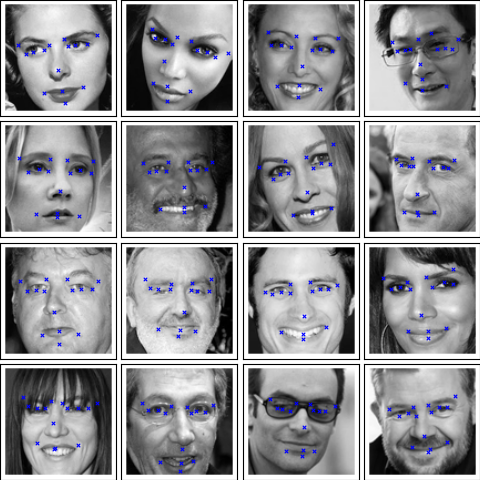

In [27]:
plot_images(test, y_linear, 30)

<IPython.core.display.Javascript object>


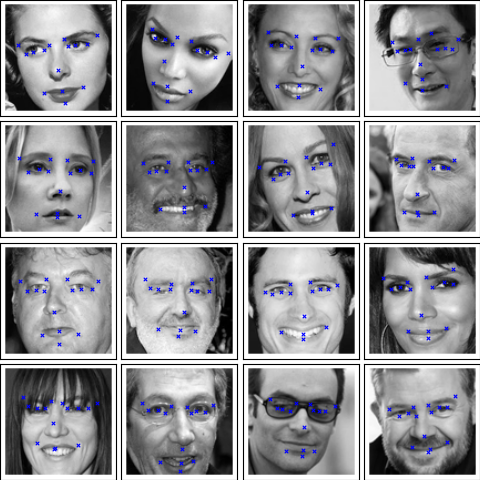

In [28]:
plot_images(test, y_ridge, 30)

Calculate MSE for linear and ridge regression:

In [29]:
from sklearn import metrics

In [30]:
y_ridge_train = ridge_clf.predict(train_X)
y_linear_train = linear_clf.predict(train_X)

In [31]:
metrics.mean_squared_error(train[keypoints_columns].values,y_ridge_train)

5.3250254260142066e-15

In [32]:
metrics.mean_squared_error(train[keypoints_columns].values,y_linear_train)

8.0760947974167971e-27

Conclusion on this test: Benchmark on full data gives more accurate result comparing to linear regression on filtered data. I think it is because I filtered out about 5000 images. My idea is to try to improve benchmark result on single feature, which is most variadic by predict it using linear regression. Will do it in "FKD_Linear"